In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

In [10]:
pip install factor-analyzer pandas numpy scikit-learn matplotlib seaborn adjustText

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Load the dataset
survey_df = pd.read_csv('D:\\SCMA\\Data\\Survey.csv', header=0)

# Check dataset structure
print(survey_df.shape)  
print(survey_df.columns) 
print(survey_df.head())  
print(survey_df.info())  

# Remove NA values
print(survey_df.isna().sum())  # Check for NA values
survey_df = survey_df.dropna()  # Drop rows with NA values

(70, 50)
Index(['City', 'Sex', 'Age', 'Occupation', 'Monthly Household Income',
       'Income', 'Planning to Buy a new house', 'Time Frame',
       'Reasons for buying a house', 'what type of House', 'Number of rooms',
       'Size of House', 'Budget', 'Finished/Semi Finished',
       'Influence Decision', 'Maintainance', 'EMI', '1.Proximity to city',
       '2.Proximity to schools', '3. Proximity to transport',
       '4. Proximity to work place', '5. Proximity to shopping',
       '1. Gym/Pool/Sports facility', '2. Parking space', '3.Power back-up',
       '4.Water supply', '5.Security', '1. Exterior look ', '2. Unit size',
       '3. Interior design and branded components',
       '4. Layout plan (Integrated etc.)', '5. View from apartment',
       '1. Price', '2. Booking amount', '3. Equated Monthly Instalment (EMI)',
       '4. Maintenance charges', '5. Availability of loan',
       '1. Builder reputation', '2. Appreciation potential',
       '3. Profile of neighbourhood', '4. Av

In [12]:
# Select columns of interest for PCA and factor analysis
sur_int = survey_df.iloc[:, 17:46]  

# Standardize the data
scaler = StandardScaler()
sur_int_scaled = scaler.fit_transform(sur_int)

In [13]:
# Performing PCA using scikit-learn
pca = PCA(n_components=5)
pca.fit(sur_int_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_ * 100
print(f"Explained variance by each component: {explained_variance}")

Explained variance by each component: [31.11037264  9.23601355  7.22509998  6.4059801   5.80393243]


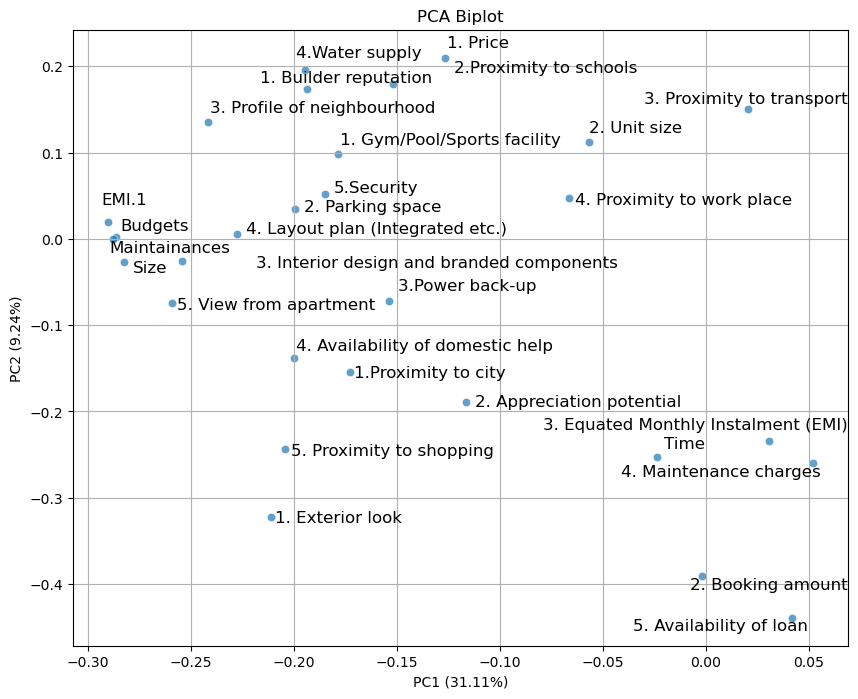

In [14]:
# PCA biplot function
def biplot_scores(pca, X):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=pca.components_[0], y=pca.components_[1], alpha=0.7)
    texts = []
    for i, txt in enumerate(X.columns):
        texts.append(plt.text(pca.components_[0][i], pca.components_[1][i], txt, fontsize=12))
    adjust_text(texts)
    
    xlabel = f'PC1 ({explained_variance[0]:.2f}%)'
    ylabel = f'PC2 ({explained_variance[1]:.2f}%)'
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('PCA Biplot')
    plt.grid(True)
    plt.show()

# Plot the PCA biplot
biplot_scores(pca, sur_int)

In [15]:




# Performing Factor Analysis using GPArotation equivalent
fa = FactorAnalyzer(rotation='promax', n_factors=5)
fa.fit(sur_int_scaled)

# Get factor loadings
loadings = fa.loadings_
print(f"Factor Loadings:\n{loadings}")

# Get communalities
communalities = fa.get_communalities()
print(f"Communalities:\n{communalities}")

# Get factor scores
factor_scores = fa.transform(sur_int_scaled)
print(f"Factor Scores:\n{factor_scores}")

# Additional Factor Analysis with Varimax rotation
fa_varimax = FactorAnalyzer(rotation='varimax', n_factors=4)
fa_varimax.fit(sur_int_scaled)

# Get Varimax factor loadings
varimax_loadings = fa_varimax.loadings_
print(f"Varimax Factor Loadings:\n{varimax_loadings}")

# Get Varimax communalities
varimax_communalities = fa_varimax.get_communalities()
print(f"Varimax Communalities:\n{varimax_communalities}")

# Get Varimax factor scores
varimax_factor_scores = fa_varimax.transform(sur_int_scaled)
print(f"Varimax Factor Scores:\n{varimax_factor_scores}")

Factor Loadings:
[[ 0.45713114 -0.15703226  0.13061431  0.52139636 -0.36036085]
 [ 0.1492056   0.07159923 -0.12304765  0.42708003  0.13165823]
 [-0.01250634 -0.01326014  0.13148086 -0.13322661  0.56875912]
 [-0.06752112 -0.20655469 -0.00230288  0.85963122 -0.05427842]
 [-0.12980614  0.75451035  0.268132    0.15129115 -0.07500403]
 [-0.03429994  0.48312484 -0.11189908  0.19510834  0.14605401]
 [ 0.07112959  0.49125826 -0.15087577  0.13754612 -0.04639496]
 [-0.16149174  0.4182796   0.02993135  0.44042428 -0.05802164]
 [ 0.23083521  0.31042463  0.07095872  0.11136157  0.69059182]
 [-0.20328661  0.89107381 -0.06997204 -0.15053079  0.27874174]
 [ 0.3415758   0.52003669  0.26881347 -0.17798148 -0.37614504]
 [ 0.33014273 -0.08989056 -0.11451406 -0.13494291 -0.00527869]
 [ 0.30543842  0.46323878 -0.04767122  0.12585473 -0.09034353]
 [ 0.43378358  0.17385919 -0.07745727  0.2361559  -0.14471444]
 [ 0.26928464  0.68161342 -0.02763744 -0.13776525 -0.08335871]
 [ 0.41089587 -0.10786063  0.01730405 

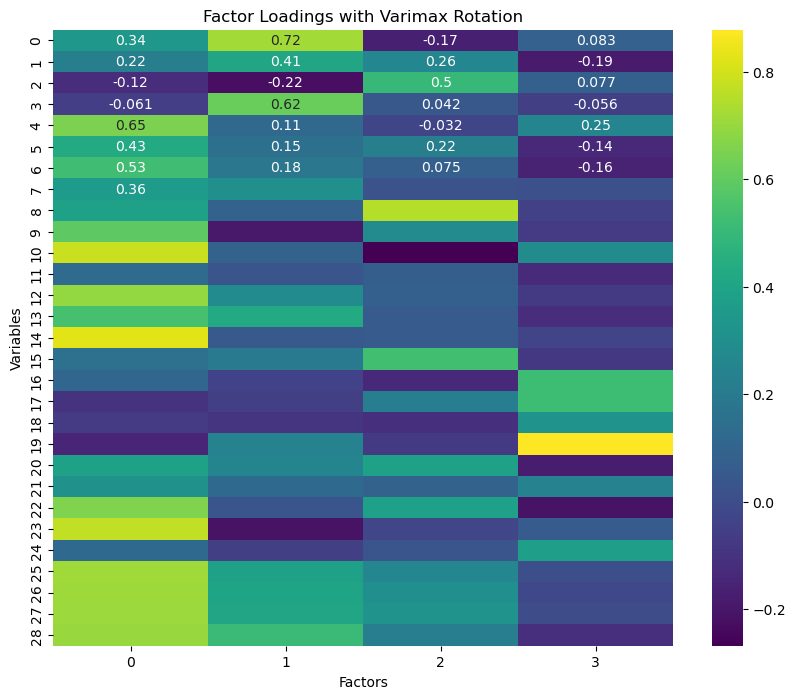

In [16]:
# Plotting the factor loadings
def plot_factor_loadings(loadings, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(loadings, annot=True, cmap='viridis')
    plt.title(title)
    plt.xlabel('Factors')
    plt.ylabel('Variables')
    plt.show()

plot_factor_loadings(varimax_loadings, 'Factor Loadings with Varimax Rotation')

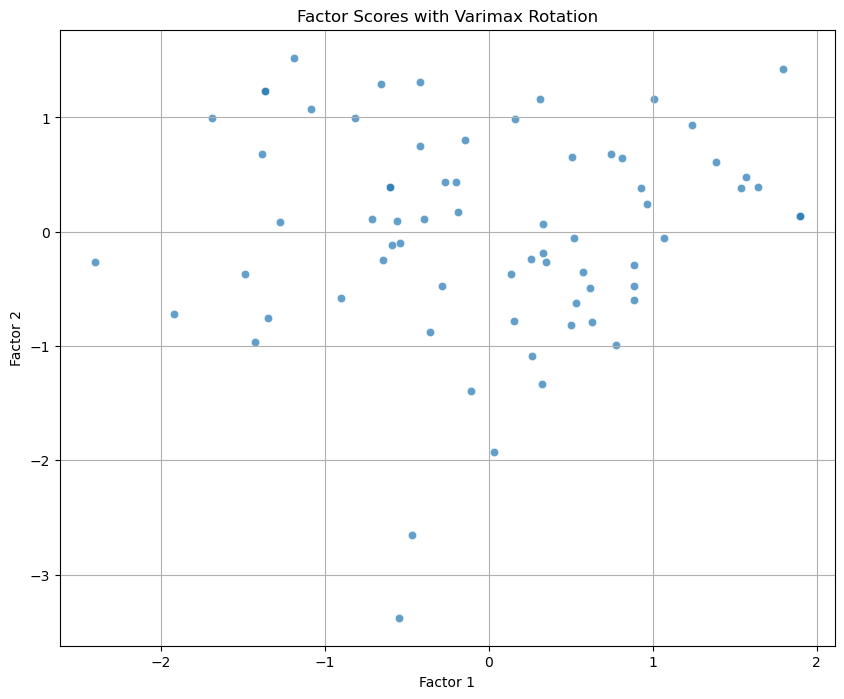

In [17]:
# Plotting factor scores
plt.figure(figsize=(10, 8))
sns.scatterplot(x=varimax_factor_scores[:, 0], y=varimax_factor_scores[:, 1], alpha=0.7)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Scores with Varimax Rotation')
plt.grid(True)
plt.show()
